<a href="https://colab.research.google.com/github/BDR-Pro/Embeddings-similarity/blob/main/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q sentence-transformers scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.4 MB/s eta 0:00:00


In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load a small local model
model = SentenceTransformer('all-MiniLM-L6-v2')  # ~80MB

# Input sentences (small and local)
sentences = [
    "I like pizza",
    "The dog barked loudly",
    "A pizza is baking in the oven",
    "He enjoys hiking in the mountains",
    "The oven is very hot",
    "She loves climbing rocks"
]

# Encode sentences into vectors
embeddings = model.encode(sentences)

# Find similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Show pairwise similarity
import pandas as pd
sim_df = pd.DataFrame(similarity_matrix, index=sentences, columns=sentences)
sim_df.style.background_gradient(cmap='Blues')


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,I like pizza,The dog barked loudly,A pizza is baking in the oven,He enjoys hiking in the mountains,The oven is very hot,She loves climbing rocks
I like pizza,1.000000,0.057062,0.409925,0.165942,0.244423,0.284546
The dog barked loudly,0.057062,1.000000,0.065188,-0.003981,0.052441,-0.010653
A pizza is baking in the oven,0.409925,0.065188,1.000000,0.053544,0.472551,-0.002186
He enjoys hiking in the mountains,0.165942,-0.003981,0.053544,1.000000,0.084321,0.380730
The oven is very hot,0.244423,0.052441,0.472551,0.084321,1.000000,0.098316
She loves climbing rocks,0.284546,-0.010653,-0.002186,0.380730,0.098316,1.000000


In [3]:
# Input query sentence
query = "Hot pizza from the oven"
query_vec = model.encode([query])

# Compute similarities to all other sentences
similarities = cosine_similarity(query_vec, embeddings)[0]

# Rank sentences by similarity
top_n = 3
results = sorted(zip(sentences, similarities), key=lambda x: x[1], reverse=True)

print(f"Top {top_n} similar sentences to '{query}':\n")
for sent, score in results[:top_n]:
    print(f"{sent}  (score: {score:.3f})")


Top 3 similar sentences to 'Hot pizza from the oven':

A pizza is baking in the oven  (score: 0.748)
The oven is very hot  (score: 0.691)
I like pizza  (score: 0.522)




```python
"""the to make video represnt cosine similarity (not actuall values)"""
from manim import *

class VisualizeCosineSimilarity(Scene):
    def construct(self):
        # Manually chosen positions to reflect similarity visually
        vecs = {
            "I like pizza": [2, 1],
            "A pizza is baking in the oven": [1.8, 0.8],
            "The oven is very hot": [1.5, 0.4],
            "The dog barked loudly": [-2, -1],
            "He enjoys hiking in the mountains": [-1.5, 1],
            "She loves climbing rocks": [-1, 1.2],
        }

        arrows = []
        labels = []

        for sentence, coords in vecs.items():
            end = np.array([coords[0], coords[1], 0])
            arrow = Arrow(start=ORIGIN, end=end, buff=0).set_color(BLUE)
            label = Text(sentence, font_size=24).next_to(end, UP)
            arrows.append(arrow)
            labels.append(label)

        # Animate vectors
        self.play(*[Create(a) for a in arrows])
        self.play(*[Write(l) for l in labels])

        # Show cosine similarity annotation between two
        sim_value = 0.409925  # example: between "I like pizza" and "A pizza is baking"
        sim_text = Text(f"cosine = {sim_value:.2f}", font_size=32).move_to([0, -3, 0])
        self.play(Write(sim_text))

        self.wait(3)
```



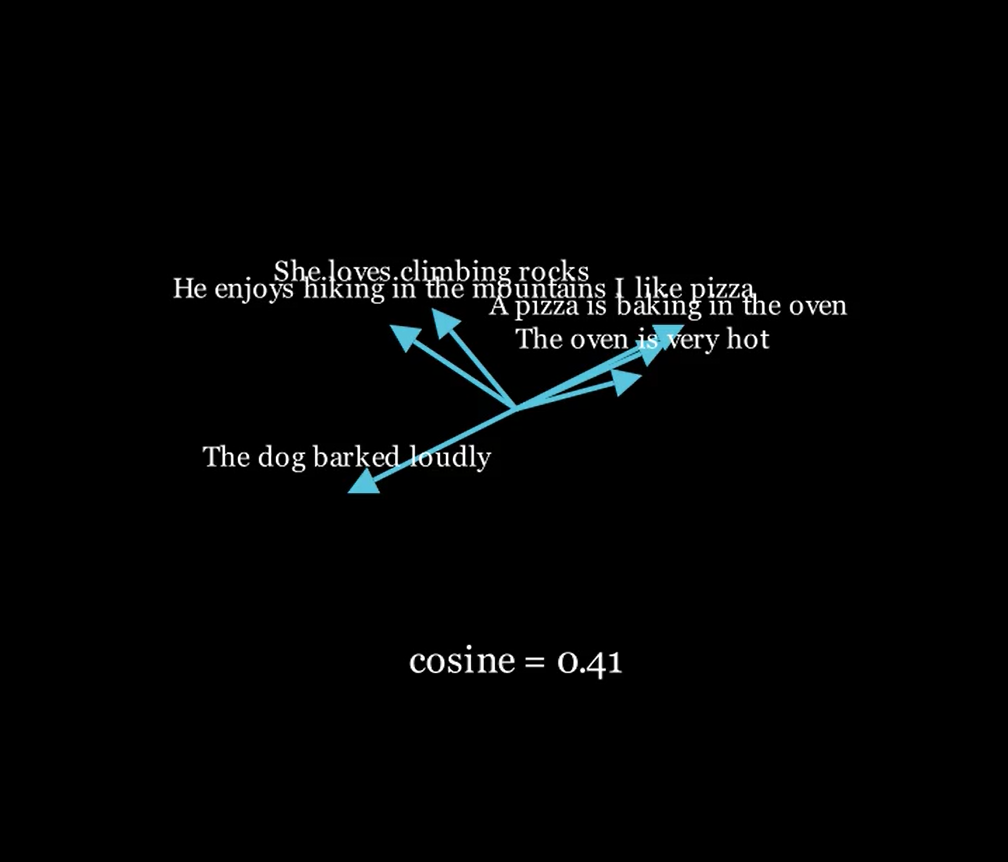